In [13]:
from helper import load_image_from_url, render_results_in_image

In [14]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

C:\Users\numan\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\module.py:2441: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
C:\Users\numan\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\module.py:2441: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
C:\Users\numan\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\module.py:2441: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta para

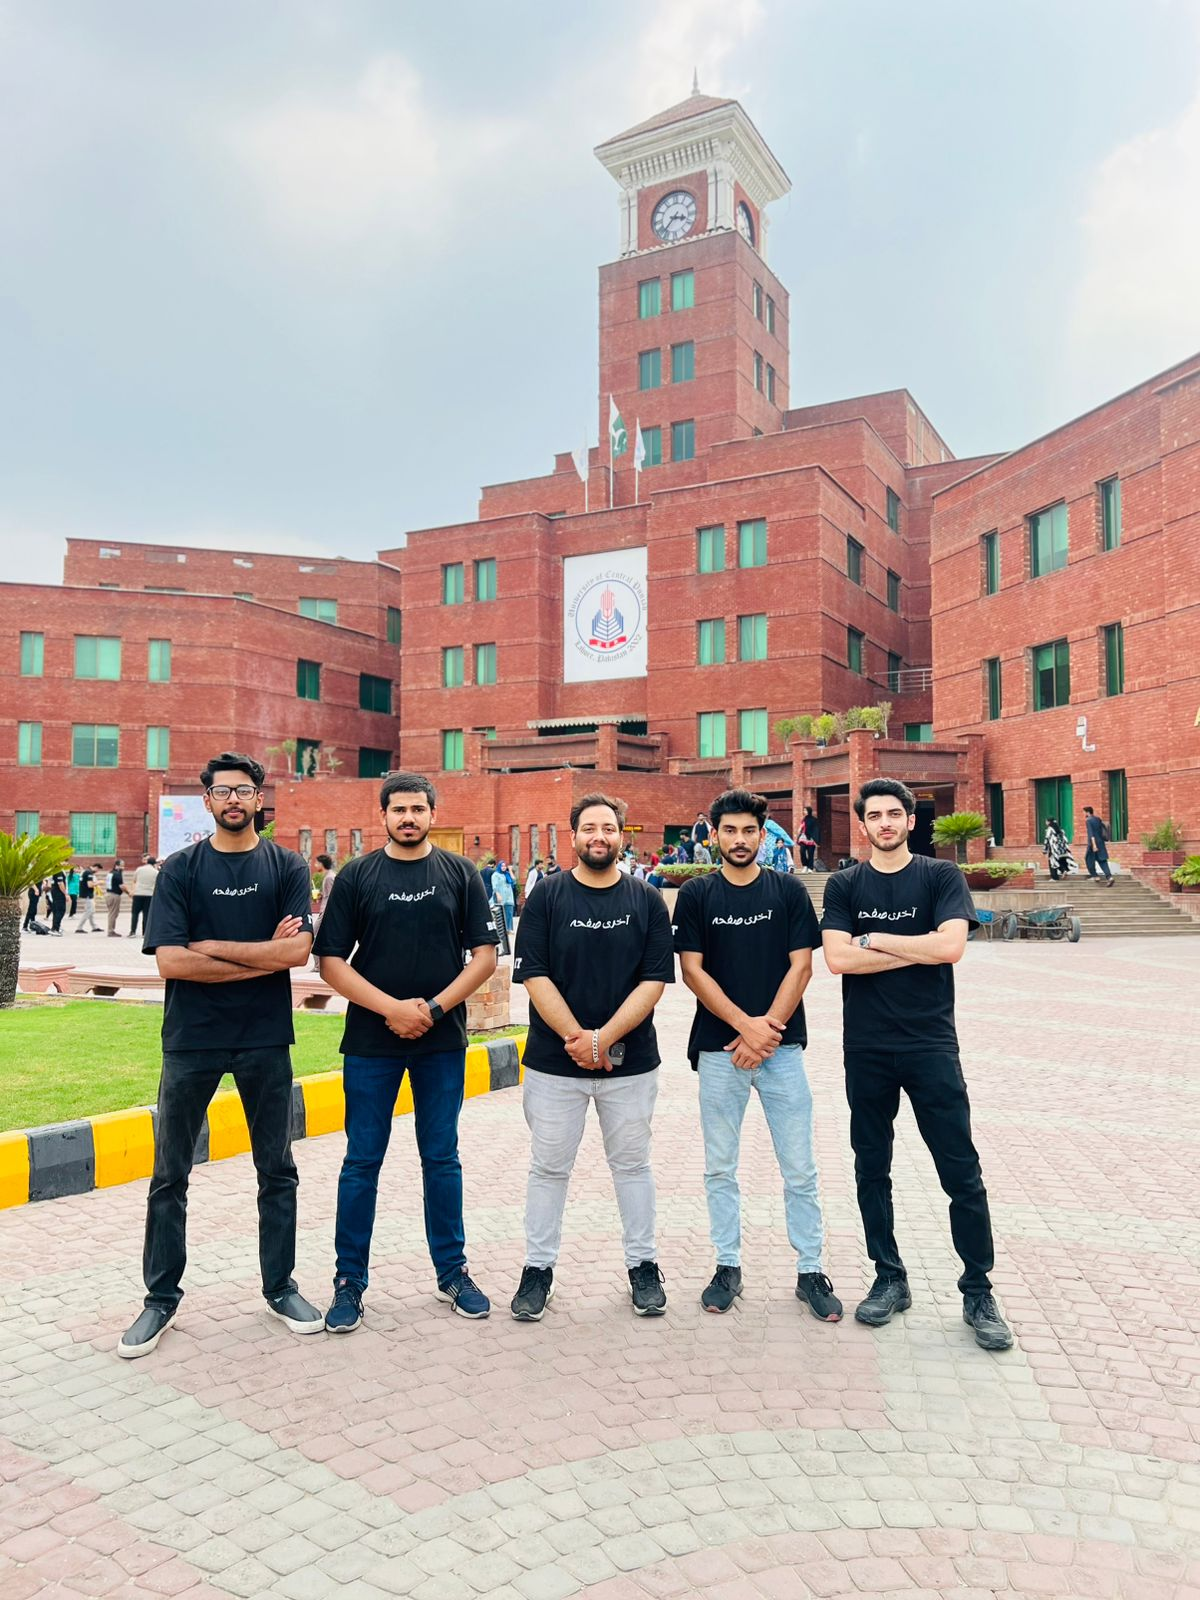

In [15]:
from PIL import Image
raw_image= Image.open("ola.jpeg")
raw_image

In [16]:
pipline_output=pipe(raw_image)


In [17]:
processed_image=render_results_in_image(
    raw_image,
    pipline_output
)

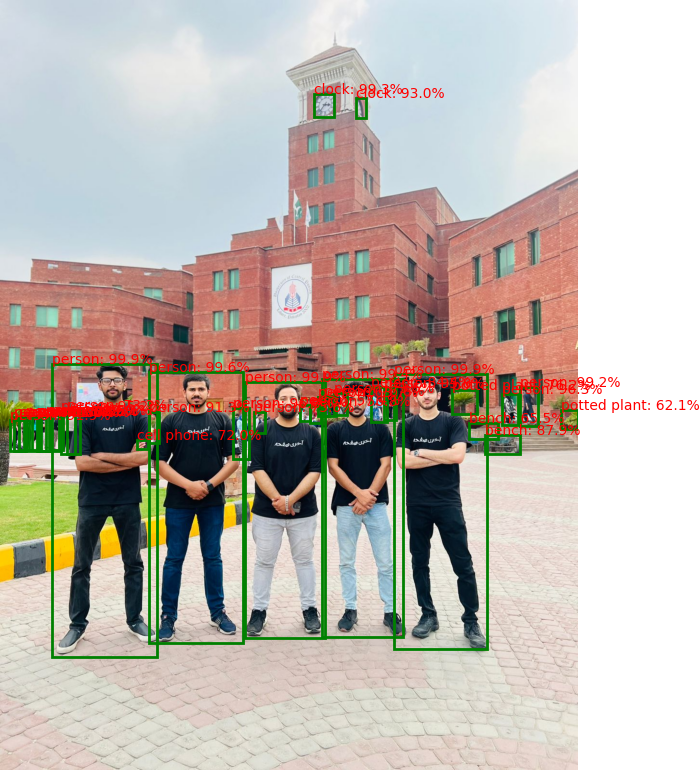

In [18]:
processed_image

In [19]:
import gradio as gr
def get_pipline_prediction(pil_image):
    pipline_output=pipe(pil_image)
    processed_image=render_results_in_image(pil_image,
    pipline_output)
    return processed_image

In [20]:
demo = gr.Interface(
  fn=get_pipline_prediction,
  inputs=gr.Image(label="Input image", 
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

In [21]:
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [22]:
pipline_output

[{'score': 0.8557513356208801,
  'label': 'person',
  'box': {'xmin': 54, 'ymin': 863, 'xmax': 80, 'ymax': 936}},
 {'score': 0.6369031667709351,
  'label': 'person',
  'box': {'xmin': 660, 'ymin': 824, 'xmax': 683, 'ymax': 864}},
 {'score': 0.5737302303314209,
  'label': 'person',
  'box': {'xmin': 623, 'ymin': 842, 'xmax': 643, 'ymax': 875}},
 {'score': 0.7197626233100891,
  'label': 'cell phone',
  'box': {'xmin': 285, 'ymin': 913, 'xmax': 308, 'ymax': 932}},
 {'score': 0.7245404720306396,
  'label': 'person',
  'box': {'xmin': 78, 'ymin': 863, 'xmax': 103, 'ymax': 936}},
 {'score': 0.6545856595039368,
  'label': 'bench',
  'box': {'xmin': 974, 'ymin': 878, 'xmax': 1035, 'ymax': 911}},
 {'score': 0.8435400724411011,
  'label': 'person',
  'box': {'xmin': 770, 'ymin': 804, 'xmax': 803, 'ymax': 876}},
 {'score': 0.8161490559577942,
  'label': 'person',
  'box': {'xmin': 28, 'ymin': 866, 'xmax': 54, 'ymax': 937}},
 {'score': 0.9190739989280701,
  'label': 'person',
  'box': {'xmin': 20,

In [23]:
from helper import summarize_predictions_natural_language

In [24]:
test= summarize_predictions_natural_language(
    pipline_output
)

In [25]:
test

'In this image, there are twenty-eight persons one cell phone two benchs two clocks and two potted plants.'